In [24]:
from scipy.io import loadmat
import numpy as np

data = loadmat('dataBenchmark.mat')

u_est = np.squeeze(data['uEst'])
y_est = np.squeeze(data['yEst'])
u_val = np.squeeze(data['uVal'])
y_val = np.squeeze(data['yVal'])

In [25]:
scale_parameter = np.abs(np.max(u_est))
u_est /= scale_parameter
u_val /= scale_parameter

In [26]:
kernels = (100, 100, 20)
R = 25

model_order = len(kernels)
model_memory_len = np.max(kernels)

In [27]:
N = 1024
stepsize_scaling_tab = [3.5, 4.5]

In [28]:
import numpy as np
from entropic_descent import *
from aggregation import *

max_sys_output = np.max(np.abs(y_est))
max_model_output = R
G_sq = (max_model_output + max_sys_output) ** 2 * R ** 2

err = {}

for stepsize_scaling in stepsize_scaling_tab:
    print("stepsize_scaling: {0}".format(stepsize_scaling))
    
    G_sq_scaled = stepsize_scaling * G_sq
    
    x = u_est[model_memory_len - 1 : N - 1]
    x0 = u_est[0 : model_memory_len - 1]
    y = y_est[model_memory_len - 1 : N - 1]
    
    # DA
    m_da = VolterraModel(kernels=kernels)
    alg = AdaptiveLazyEntropicDescentAlgorithm(m_da.dictionary, R=R, constraint='ball')
    da_parameters = alg.run(x, y, G_sq_scaled, x0=x0)
    
    # validate
    m_da.set_parameters(da_parameters)
    y_mod_da = m_da.evaluate_output(u_val)
    err[stepsize_scaling] = 1 / len(u_val) * np.sum((y_mod_da - y_val) ** 2)


print(err)

stepsize_scaling: 3.5
stepsize_scaling: 4.5
{3.5: 1.3447682747704337, 4.5: 1.3465964718475618}


100%|██████████| 924/924 [04:51<00:00,  3.17it/s]


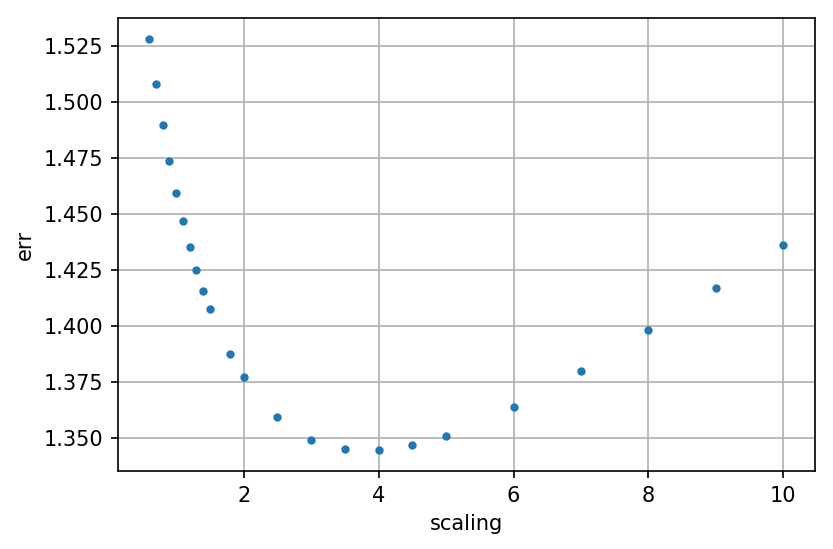

In [30]:
import matplotlib.pyplot as plt

err = {0.6: 1.5282887388540476, 0.7: 1.5079389710890545, 1.2: 1.4351819270164146, 1.1: 1.4466147035399088, 0.8: 1.4898420206182423, 1: 1.4594055754256594, 1.4: 1.4157532320110935, 1.3: 1.424941679579029, 0.9: 1.4737436929115868, 1.5: 1.4074941157551069, 2.0: 1.3769981736774453, 3: 1.3491523187125298, 2.5: 1.3590436790633982, 1.8: 1.3873346614533495, 4: 1.3442783463487125, 5: 1.35096238715568, 6: 1.363804935329162, 7: 1.3799746298079039, 8: 1.3979153236787767, 9: 1.4167478066314734, 10: 1.4359654541554654, 3.5: 1.3447682747704337, 4.5: 1.3465964718475618}


plt.rcParams['figure.dpi'] = 150
plt.plot(err.keys(), err.values(), '.')
plt.xlabel('scaling')
plt.ylabel('err')
plt.grid()
plt.show()


#err = {0.6: 1.5282887388540476, 0.7: 1.5079389710890545, 1.2: 1.4351819270164146, 1.1: 1.4466147035399088, 0.8: 1.4898420206182423, 1: 1.4594055754256594, 1.4: 1.4157532320110935, 1.3: 1.424941679579029, 0.9: 1.4737436929115868}
#err = {1.5: 1.4074941157551069, 2.0: 1.3769981736774453, 3: 1.3491523187125298, 2.5: 1.3590436790633982, 1.8: 1.3873346614533495}
#err = {4: 1.3442783463487125, 5: 1.35096238715568, 6: 1.363804935329162, 7: 1.3799746298079039, 8: 1.3979153236787767, 9: 1.4167478066314734, 10: 1.4359654541554654}
#err = {3.5: 1.3447682747704337, 4.5: 1.3465964718475618}